<a href="https://colab.research.google.com/github/MinhBaLe/Projet-tripadvisor-Italy/blob/main/Project_tripadsor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import seaborn as sns
sns.set_theme() # permet d'obtenir le fonc gris avec les lignes blanches
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install geopy

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
tripadvisor = pd.read_table('/content/drive/MyDrive/monfichier.csv', sep = ',')
tripadvisor

,region,total_restaurants,mean_rating,mean_food,mean_service,mean_values,mean_athmosphere,total_reviews,mean_reviews_n,median_reviews_n,mean_price,median_price,open_days_per_week,open_hours_per_week,working_shifts_per_week
0,Lombardy,33097,3.945,4.005,3.903,3.830,3.813,3873366.0,123.651,34.0,27.165,20.0,6.326,59.027,9.138
1,Lazio,23831,4.037,4.090,3.992,3.930,3.860,3971981.0,174.256,38.0,54649.839,20.0,6.344,64.346,8.073
2,Tuscany,18861,4.092,4.149,4.029,3.996,3.932,3311618.0,177.491,45.0,8231.840,21.0,6.254,55.880,8.355
3,Veneto,17823,4.009,4.077,3.971,3.893,3.890,2404154.0,137.372,39.0,12920.238,20.0,6.229,59.489,8.646
4,Campania,17569,4.079,4.142,4.000,3.988,3.933,2359729.0,140.661,32.0,1143.956,19.0,6.354,65.939,8.173
5,Emilia-Romagna,17568,4.014,4.084,3.943,3.893,3.828,2293396.0,136.317,39.0,1157.258,20.0,6.212,57.016,8.747
6,Piedmont,16330,4.017,4.066,3.971,3.924,3.876,1683847.0,105.670,31.0,23.833,20.0,6.105,53.907,8.389
7,Sicily,15701,4.096,4.154,4.026,4.010,3.920,2083772.0,135.990,29.0,27.441,17.5,6.396,67.185,8.248
8,Puglia,12452,4.038,4.112,3.961,3.964,3.908,1713132.0,140.398,38.0,1365.575,20.0,6.363,62.236,8.263
9,Liguria,8971,4.043,4.093,3.964,3.924,3.873,1244923.0,143.557,45.0,39889.171,21.5,6.289,57.708,8.579


In [5]:
import pandas as pd
# Affichage du nombre d'observations et de variables
print("Nombre d'observations :", tripadvisor.shape[0])
print("Nombre de variables :", tripadvisor.shape[1])

Nombre d'observations : 20
Nombre de variables : 15


In [6]:
variables = ['total_restaurants', 'mean_rating', 'mean_food']

# Calcul de la moyenne pour chaque variable
moyennes = tripadvisor[variables].mean()

# Calcul de la variance pour chaque variable
variances = tripadvisor[variables].var()

print("Moyennes :")
print(moyennes)
print("\nVariances :")
print(variances)

Moyennes :
total_restaurants    11238.15000
mean_rating              4.05875
mean_food                4.11875
dtype: float64

Variances :
total_restaurants    7.383338e+07
mean_rating          2.484092e-03
mean_food            2.288513e-03
dtype: float64


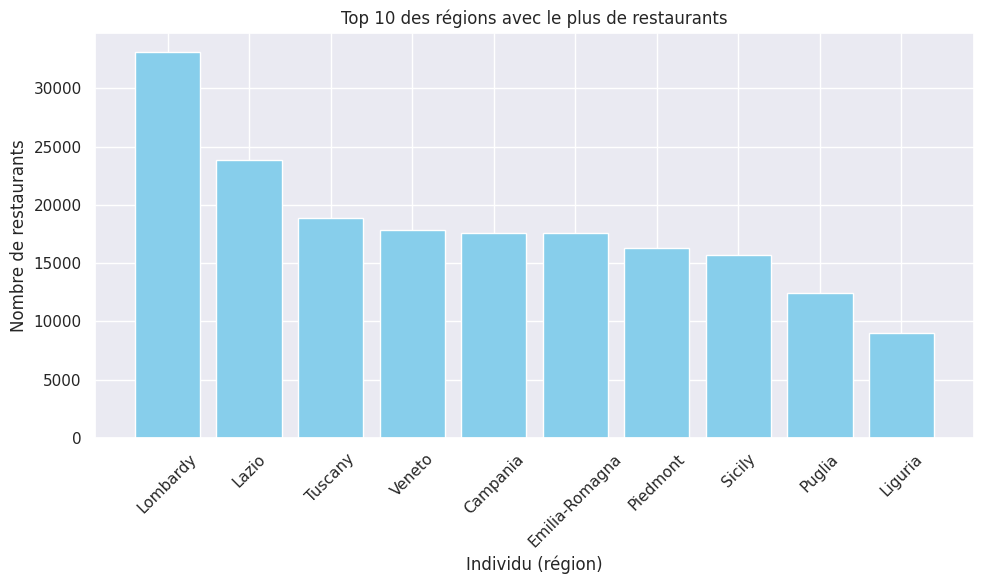

In [7]:
top10 = tripadvisor.sort_values('total_restaurants', ascending=False).head(10)

# Création du diagramme en barre
plt.figure(figsize=(10,6))
plt.bar(top10['region'], top10['total_restaurants'], color='skyblue')
plt.xlabel("Individu (région)")
plt.ylabel("Nombre de restaurants")
plt.title("Top 10 des régions avec le plus de restaurants")
plt.xticks(rotation=45)
plt.tight_layout()  # Pour ajuster l'affichage si nécessaire
plt.show()

<ipython-input-9-df4293ae548e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='region', x='total_restaurants', data=pd.DataFrame(top10), palette='viridis')


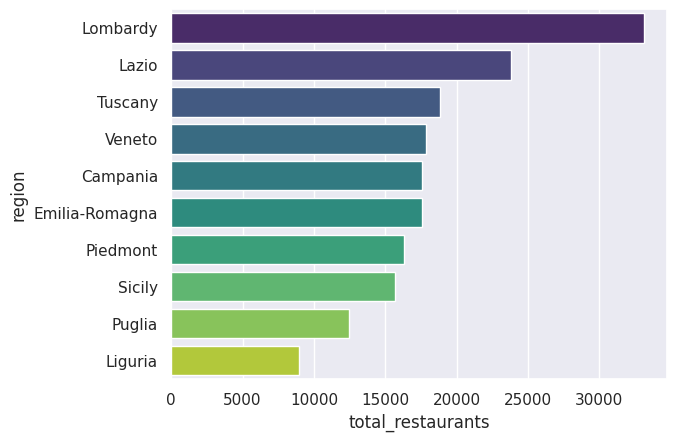

In [9]:
ax = sns.barplot(y='region', x='total_restaurants', data=pd.DataFrame(top10), palette='viridis')
plt.show()

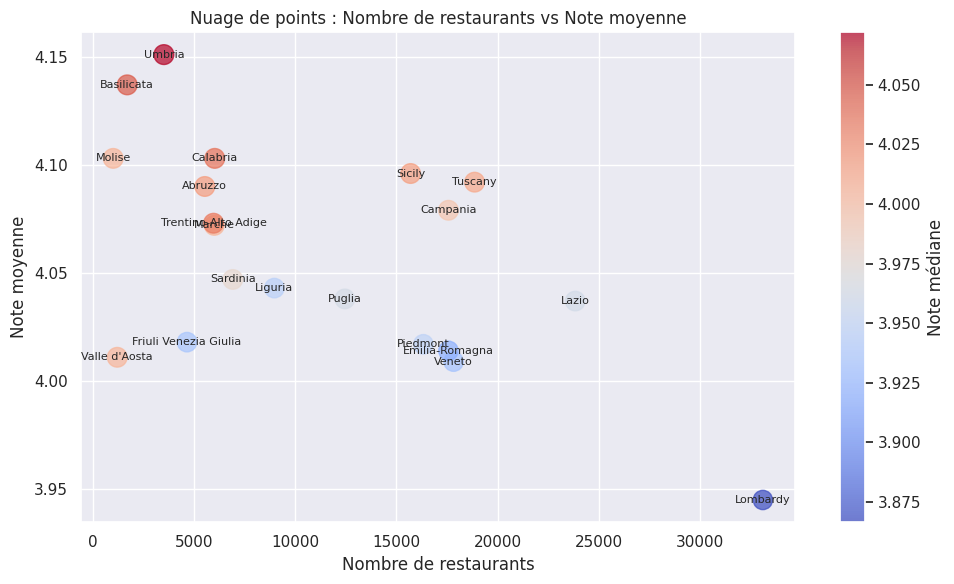

In [11]:
# Variables pour le nuage de points :
# - Abscisses : nombre de restaurants
# - Ordonnées : note moyenne
# - Taille et couleur : note médiane
x = tripadvisor['total_restaurants']
y = tripadvisor['mean_rating']

# Assurez-vous que la colonne 'median_rating' existe.
# Si elle n'existe pas, adaptez avec le nom de la colonne adéquate.
median_rating = tripadvisor[['mean_food','mean_service','mean_values', 'mean_athmosphere']].median(axis=1)

# Définir la taille des points en fonction de la note médiane (avec un facteur d'échelle)
scale_factor = 50  # Vous pouvez ajuster ce facteur pour obtenir une taille de points convenable
sizes = median_rating * scale_factor

# Création du nuage de points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=median_rating, cmap='coolwarm', alpha=0.7)

plt.xlabel("Nombre de restaurants")
plt.ylabel("Note moyenne")
plt.title("Nuage de points : Nombre de restaurants vs Note moyenne")

# Ajout d'une barre de couleur indiquant la note médiane
cbar = plt.colorbar(scatter)
cbar.set_label("Note médiane")

# Ajout des labels pour chaque point (ici, on utilise le nom de l'individu, par exemple 'region')
for i, row in tripadvisor.iterrows():
    plt.text(row['total_restaurants'], row['mean_rating'], row['region'], fontsize=8,
             ha='center', va='center')

plt.tight_layout()
plt.show()

In [12]:
# Supposons que votre DataFrame s'appelle tripadvisor
# et que les variables quantitatives à inclure dans l'ACP sont les suivantes :
variables_numeriques = [
    'total_restaurants', 'mean_rating', 'mean_food', 'mean_service',
    'mean_values', 'mean_athmosphere', 'total_reviews', 'mean_reviews_n',
    'median_reviews_n', 'mean_price', 'median_price', 'open_days_per_week',
    'open_hours_per_week', 'working_shifts_per_week'
]

# Extraction des données quantitatives
data_quant = tripadvisor[variables_numeriques]

# Centrer et réduire les données
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_quant)
print(data_standardized)

[[ 2.60999178 -2.34156251 -2.43956782 -2.36176968 -1.97270371 -1.74887969
   1.98907021 -0.15954386 -0.36362523 -0.49006634 -0.27656329  0.466345
  -0.43564321  2.4421618 ]
 [ 1.50361226 -0.44772734 -0.61659406 -0.04042786 -0.48049213 -0.96642043
   2.07117813  1.78337855  0.28281963  2.58821774 -0.27656329  0.66455539
   0.93235645 -1.64698578]
 [ 0.91018401  0.68445673  0.64876419  0.92462435  0.50436751  0.23224057
   1.52135276  1.90758276  1.41409813 -0.02768838  0.3380218  -0.32649656
  -1.24502371 -0.56422557]
 [ 0.78624467 -1.02411195 -0.89540181 -0.5881602  -1.03261041 -0.46697835
   0.76578842  0.3672586   0.44443084  0.23652828 -0.27656329 -0.60178877
  -0.3168209   0.55309081]
 [ 0.75591655  0.41684959  0.49863694  0.16823208  0.38499059  0.24888864
   0.72879969  0.49353608 -0.68684766 -0.42712911 -0.89114837  0.77467228
   1.34206192 -1.26302826]
 [ 0.75579715 -0.92118613 -0.74527456 -1.31846999 -1.03261041 -1.49915865
   0.67357011  0.32675305  0.44443084 -0.42637947 -0.

In [13]:
# Conversion en DataFrame pour faciliter l'affichage
df_standardized = pd.DataFrame(data_standardized, columns=variables_numeriques)

# Sélection des trois premières variables
premieres_vars = df_standardized.iloc[:, :3]

# Calcul des moyennes et variances
moyennes = premieres_vars.mean()
variances = premieres_vars.var(ddof=0)  # ddof=0 pour la variance de la population

print("Moyennes des 3 premières variables (après centrage et réduction) :")
print(moyennes)
print("\nVariances des 3 premières variables (après centrage et réduction) :")
print(variances)

Moyennes des 3 premières variables (après centrage et réduction) :
total_restaurants    3.330669e-17
mean_rating          2.055023e-14
mean_food           -8.562595e-15
dtype: float64

Variances des 3 premières variables (après centrage et réduction) :
total_restaurants    1.0
mean_rating          1.0
mean_food            1.0
dtype: float64


Tableau des valeurs propres et de la variance expliquée :
        Valeurs propres  Variance expliquée (%)  \
Axe 1          5.757678               39.069959   
Axe 2          2.681157               18.193565   
Axe 3          2.046821               13.889141   
Axe 4          1.466191                9.949156   
Axe 5          1.077777                7.313485   
Axe 6          0.730242                4.955210   
Axe 7          0.481535                3.267557   
Axe 8          0.253323                1.718977   
Axe 9          0.114893                0.779632   
Axe 10         0.082782                0.561738   
Axe 11         0.024128                0.163725   
Axe 12         0.012996                0.088186   
Axe 13         0.004394                0.029813   
Axe 14         0.002926                0.019855   

        Variance expliquée cumulée (%)  
Axe 1                        39.069959  
Axe 2                        57.263525  
Axe 3                        71.152666  
Axe 4       

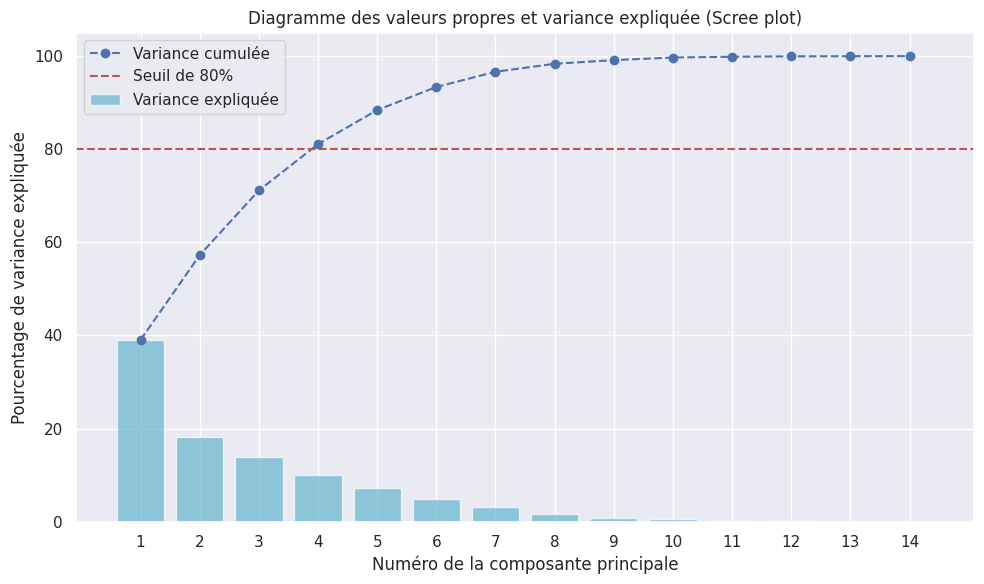

In [15]:
# Réalisation de l'ACP
pca = PCA()
pca.fit(data_standardized)  # data_standardized est votre table centrée et réduite

# Récupération des valeurs propres et des proportions de variance expliquées
valeurs_propres = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()  # Variance cumulée

# Création d'un DataFrame pour résumer les résultats
axes = [f"Axe {i+1}" for i in range(len(valeurs_propres))]
variance_df = pd.DataFrame({
    "Valeurs propres": valeurs_propres,
    "Variance expliquée (%)": explained_variance_ratio * 100,
    "Variance expliquée cumulée (%)": cumulative_variance * 100
}, index=axes)

# Affichage du tableau
print("Tableau des valeurs propres et de la variance expliquée :")
print(variance_df)

# Tracer le Scree Plot (diagramme des variances expliquées)
plt.figure(figsize=(10, 6))

# Tracer les barres pour la variance expliquée par chaque composante
plt.bar(range(1, len(valeurs_propres) + 1), explained_variance_ratio * 100, color='c', alpha=0.7, label="Variance expliquée")

# Tracer la courbe de la variance cumulée
plt.plot(range(1, len(valeurs_propres) + 1), cumulative_variance * 100, marker='o', linestyle='--', color='b', label="Variance cumulée")

# Ligne horizontale à 80% (seuil de référence)
plt.axhline(80, color='r', linestyle='--', label="Seuil de 80%")

# Ajout de labels et de légendes
plt.title("Diagramme des valeurs propres et variance expliquée (Scree plot)")
plt.xlabel("Numéro de la composante principale")
plt.ylabel("Pourcentage de variance expliquée")
plt.xticks(range(1, len(valeurs_propres) + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()

In [16]:
# Cumul de la variance expliquée par les 2 premiers axes
variance_2_axes = cumulative_variance[1]*100  # Cumul de la variance jusqu'au 2e axe (indice 1)

# Cumul de la variance expliquée par les 4 premiers axes
variance_4_axes = cumulative_variance[3]*100  # Cumul de la variance jusqu'au 4e axe (indice 3)

# Affichage des résultats
print(f"Inertie restituée par les 2 premiers axes : {variance_2_axes:.2f} %")
print(f"Inertie restituée par les 4 premiers axes : {variance_4_axes:.2f} %")

Inertie restituée par les 2 premiers axes : 57.26 %
Inertie restituée par les 4 premiers axes : 81.10 %


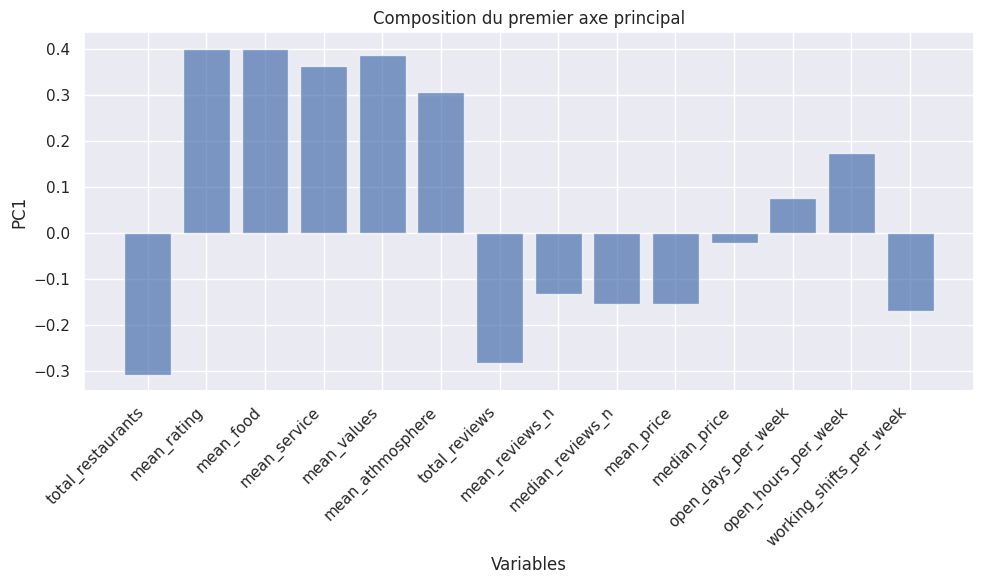

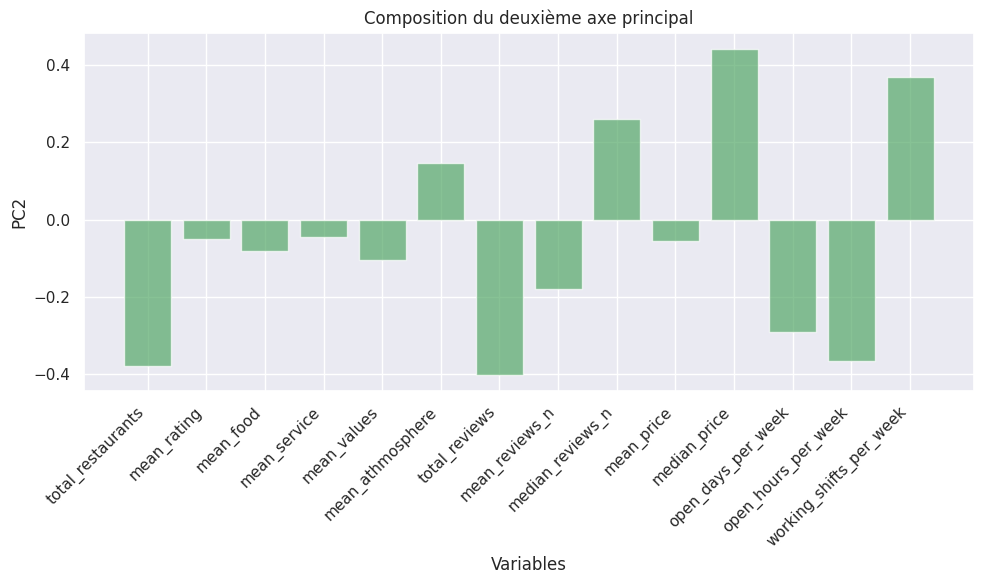

In [17]:
# Récupération des composantes principales
composantes = pca.components_  # Les vecteurs propres (directions des axes)

# Noms des variables (colonnes des données)
variables_numeriques = [
    'total_restaurants', 'mean_rating', 'mean_food', 'mean_service',
    'mean_values', 'mean_athmosphere', 'total_reviews', 'mean_reviews_n',
    'median_reviews_n', 'mean_price', 'median_price', 'open_days_per_week',
    'open_hours_per_week', 'working_shifts_per_week'
]

# Diagramme en barres pour la composition du premier axe principal
plt.figure(figsize=(10, 6))
plt.bar(variables_numeriques, composantes[0], color='b', alpha=0.7)  # Composition du 1er axe
plt.xlabel('Variables')
plt.ylabel('PC1')
plt.title('Composition du premier axe principal')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour lisibilité
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagramme en barres pour la composition du deuxième axe principal
plt.figure(figsize=(10, 6))
plt.bar(variables_numeriques, composantes[1], color='g', alpha=0.7)  # Composition du 2e axe
plt.xlabel('Variables')
plt.ylabel('PC2')
plt.title('Composition du deuxième axe principal')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

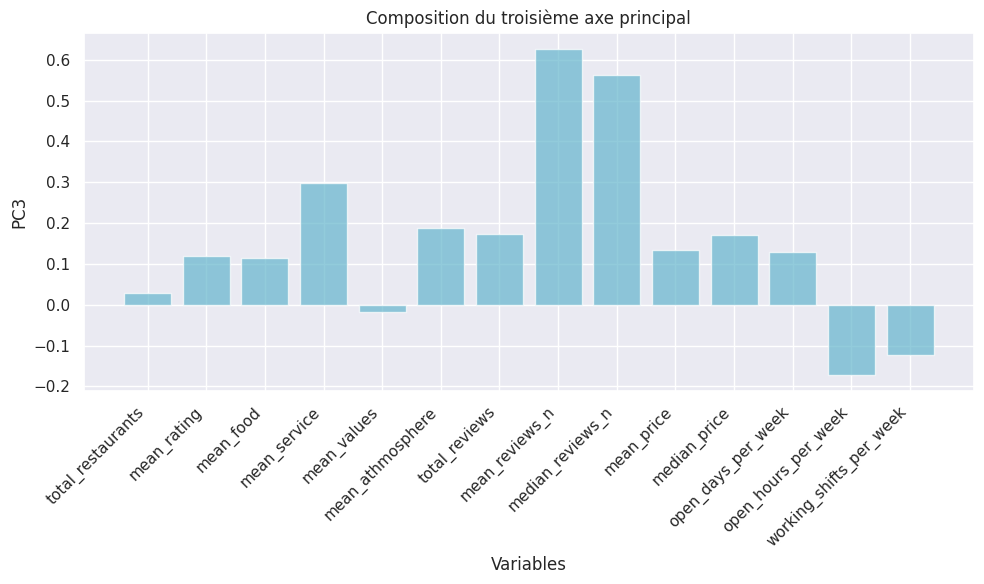

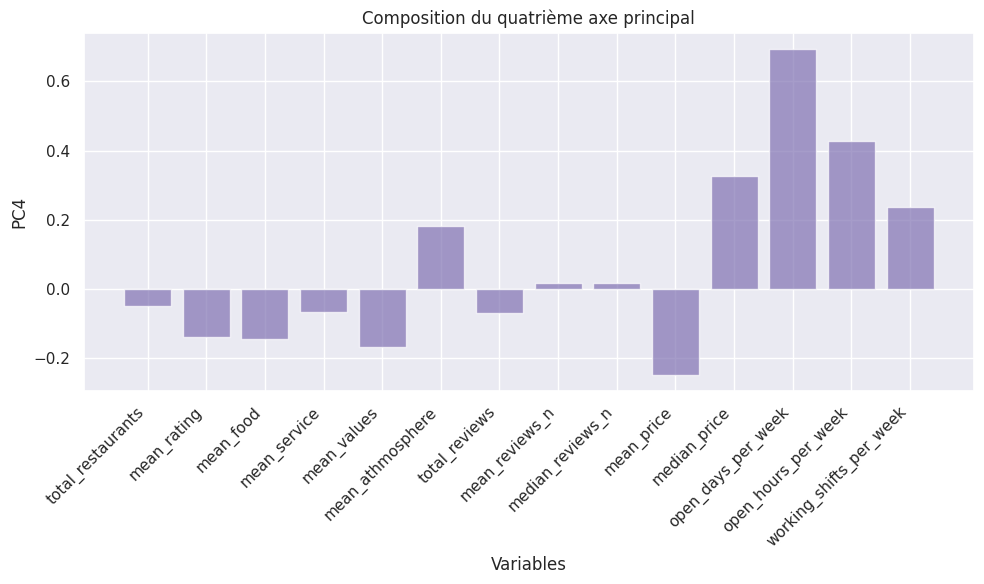

In [18]:
# Diagramme en barres pour la composition du troisième axe principal
plt.figure(figsize=(10, 6))
plt.bar(variables_numeriques, composantes[2], color='c', alpha=0.7)  # Composition du 3e axe
plt.xlabel('Variables')
plt.ylabel('PC3')
plt.title('Composition du troisième axe principal')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour lisibilité
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagramme en barres pour la composition du quatrième axe principal
plt.figure(figsize=(10, 6))
plt.bar(variables_numeriques, composantes[3], color='m', alpha=0.7)  # Composition du 4e axe
plt.xlabel('Variables')
plt.ylabel('PC4')
plt.title('Composition du quatrième axe principal')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
!pip install geopy
from geopy.geocoders import Nominatim
import pandas as pd
import plotly.express as px
import time

# Exemple de données (remplacez par vos données réelles)
data_geo = pd.DataFrame({
   'Region': tripadvisor['region'],
    'Mean Rating': tripadvisor['mean_rating']
})

# Initialisation du géocodeur avec un user_agent plus spécifique et un timeout plus long
geolocator = Nominatim(user_agent="my-geocoding-app", timeout=10)

# Listes pour stocker les latitudes et longitudes
latitudes = []
longitudes = []

# Géocodage des régions
for region in data_geo['Region']:
    try:
        location = geolocator.geocode(region)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
        time.sleep(1)  # Délai pour éviter de dépasser les limites de requêtes
    except GeocoderInsufficientPrivileges:
        print(f"Erreur 403 pour la région : {region}")
        latitudes.append(None)
        longitudes.append(None)
        # Vous pouvez ajouter ici une gestion d'erreur plus avancée,
        # comme réessayer après un délai plus long ou utiliser un autre géocodeur.

# Ajout des colonnes Latitude et Longitude
data_geo['Latitude'] = latitudes
data_geo['Longitude'] = longitudes

# Suppression des régions sans coordonnées valides
data_geo = data_geo.dropna(subset=['Latitude', 'Longitude'])

# Création de la carte
fig = px.scatter_geo(
    data_geo,
    lat='Latitude',
    lon='Longitude',
    text='Region',
    size='Mean Rating',
    color='Mean Rating',
    color_continuous_scale='Viridis',
    title='Répartition géographique des notes moyennes'
)

# Affichage de la carte
fig.show()

In [20]:
# Supposons que 'data_projected' contienne les coordonnées des individus sur les axes principaux
data_projected = pd.DataFrame({
    'Axe 1': pca.transform(data_standardized)[:, 0],  # Projection sur le 1er axe
    'Axe 2': pca.transform(data_standardized)[:, 1],  # Projection sur le 2e axe
    'Mean Rating': tripadvisor['mean_rating'],  # Variable utilisée pour la taille des points
    'Nom Individu': tripadvisor['region']  # Noms des individus (pays/régions/villes)
})

# Création du nuage de points interactif
fig = px.scatter(
    data_projected,
    x='Axe 1',
    y='Axe 2',
    size='Mean Rating',  # Taille des points proportionnelle à la note moyenne
    text='Nom Individu',  # Noms affichés lors du survol de la souris
    hover_name='Nom Individu',  # Affiche le nom complet dans la boîte d'info
    title='Projection des individus sur le 1er plan factoriel (axes 1 et 2)',
    labels={'Axe 1': 'Premier axe principal', 'Axe 2': 'Deuxième axe principal'}
)

# Affichage du graphique
fig.show()

In [22]:
# Récupérer le vecteur des proportions de variance expliquée par chaque axe
explained_variance_ratio = pca.explained_variance_ratio_

# Calcul de l'inertie expliquée par les 2 premiers axes (en %)
inertie_2 = explained_variance_ratio[:2].sum() * 100

# Calcul de l'inertie expliquée par les 4 premiers axes (en %)
inertie_4 = explained_variance_ratio[:4].sum() * 100

print("Inertie expliquée par les 2 premiers axes factoriels : {:.2f}%".format(inertie_2))
print("Inertie expliquée par les 4 premiers axes factoriels : {:.2f}%".format(inertie_4))

Inertie expliquée par les 2 premiers axes factoriels : 57.26%
Inertie expliquée par les 4 premiers axes factoriels : 81.10%


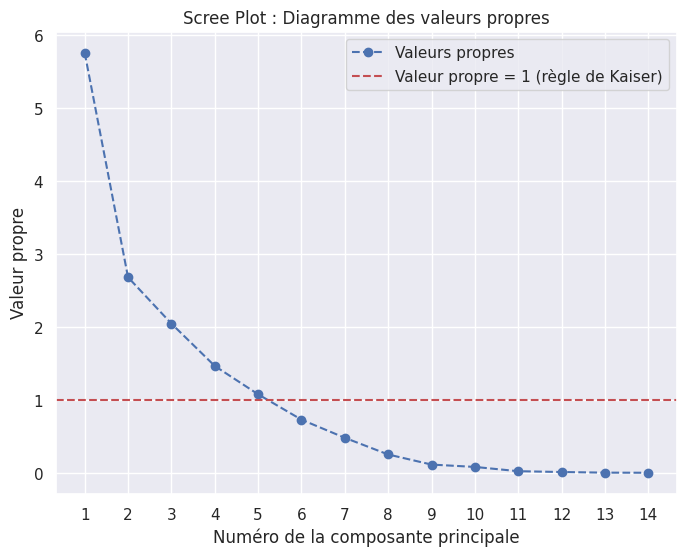

In [23]:
# Réaliser l'ACP sur les données standardisées
pca = PCA()
pca.fit(data_standardized)  # data_standardized est votre tableau des données centrées réduites

# Récupération des valeurs propres
valeurs_propres = pca.explained_variance_

# Récupération de la proportion de variance expliquée par chaque composante
explained_variance_ratio = pca.explained_variance_ratio_

# Tracer le scree plot
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(valeurs_propres) + 1),
    valeurs_propres,
    marker='o',
    linestyle='--',
    color='b',
    label='Valeurs propres'
)

# Ajouter des labels et un titre
plt.xlabel("Numéro de la composante principale")
plt.ylabel("Valeur propre")
plt.title("Scree Plot : Diagramme des valeurs propres")
plt.xticks(range(1, len(valeurs_propres) + 1))  # Affichage des étiquettes des axes x
plt.axhline(y=1, color='r', linestyle='--', label="Valeur propre = 1 (règle de Kaiser)")
plt.grid(True)
plt.legend()

# Affichage du graphique
plt.show()